# Distribucion de los Datos


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

sns.set_theme("paper")

In [4]:
state_abreviations = [
    "AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA",
    "KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ",
    "NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT",
    "VA","WA","WV","WI","WY",
]

In [5]:
df_maps_restaurantes = pd.read_parquet(r"Generated\Google\metada_sitios.parquet")

In [6]:
def get_state_ab(st):
    try:
        state = st.split(", ")[-1].split(" ")[0]
        if state in state_abreviations:
            return state
        else:
            return np.nan
    except:
        return np.nan


df_maps_restaurantes["state_ab"] = df_maps_restaurantes["address"].apply(get_state_ab)

In [7]:
top_5 = df_maps_restaurantes["state_ab"].value_counts().head(5).index.to_list()

In [8]:
df_maps_restaurantes = df_maps_restaurantes[
    df_maps_restaurantes["state_ab"].isin(top_5)
]

In [9]:
df_maps_restaurantes.reset_index(inplace=True)

In [10]:
df_maps_restaurantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   index             3062 non-null   int64   
 1   name              3062 non-null   object  
 2   address           3062 non-null   object  
 3   gmap_id           3062 non-null   object  
 4   description       3044 non-null   object  
 5   latitude          3062 non-null   float64 
 6   longitude         3062 non-null   float64 
 7   category          3062 non-null   object  
 8   avg_rating        3062 non-null   float32 
 9   num_of_reviews    3062 non-null   int32   
 10  price             3041 non-null   category
 11  hours             3019 non-null   object  
 12  MISC              3062 non-null   object  
 13  state             3019 non-null   object  
 14  relative_results  2890 non-null   object  
 15  url               3062 non-null   object  
 16  state_ab          3062 n

In [11]:
conteo_restaurantes = df_maps_restaurantes.name.value_counts()

C:\Users\misag\AppData\Local\Temp\ipykernel_2740\2805114003.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


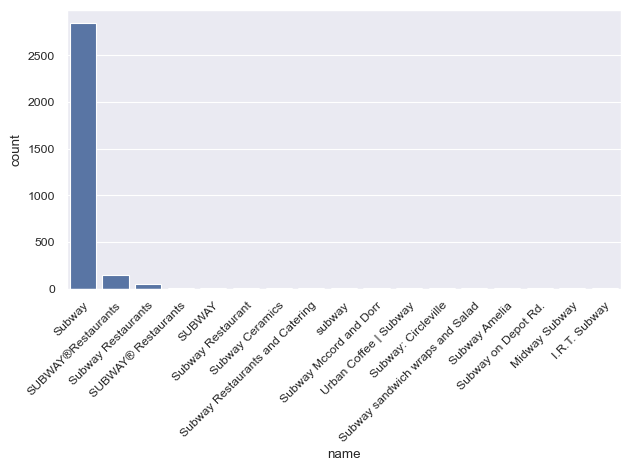

In [12]:
ax = sns.barplot(conteo_restaurantes.head(25))
ax.set_xticklabels(
    ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor"
)
plt.tight_layout()
plt.show()

In [13]:
df_maps_restaurantes.address.apply(lambda s: s.split(",")[0]).value_counts()

address
Subway                             2847
SUBWAY®Restaurants                  141
Subway Restaurants                   51
SUBWAY® Restaurants                   5
SUBWAY                                4
Subway Restaurant                     3
Subway Ceramics                       1
Subway Restaurants and Catering       1
subway                                1
Subway Mccord and Dorr                1
Urban Coffee | Subway                 1
Subway: Circleville                   1
Subway sandwich wraps and Salad       1
Subway Amelia                         1
Subway on Depot Rd.                   1
Midway Subway                         1
I.R.T. Subway                         1
Name: count, dtype: int64

In [14]:
df_maps_restaurantes.address.apply(lambda s: s.split(",")[1]).value_counts().tail(15)

address
1415 W 11th St                   1
2455 W Pike                      1
8553 E Washington St             1
1602 El Camino Real              1
236 S State St 1st Floor         1
500 W Madison St Unit Gf-5       1
500 Lawrence Expy                1
Tops Plaza                       1
Food Court                       1
801 E Milam St                   1
4720 Sweetwater Blvd             1
146 N Grand Ave                  1
610 Exterior Street              1
Farms Premium Outlets            1
6029 Groveport Rd Storeroom A    1
Name: count, dtype: int64

In [15]:
def split3(s):
    try:
        return s.split(",")[2]
    except:
        return np.nan
    return np.nan

In [16]:
df_maps_restaurantes.address.apply(split3).value_counts()

address
Chicago                67
Houston                66
New York               58
Los Angeles            41
Queens                 35
                       ..
3 Co Rd 403 W Suite     1
Uniontown               1
Broadalbin              1
West Sacramento         1
Groveport               1
Name: count, Length: 1442, dtype: int64

In [17]:
df_maps_restaurantes.address.apply(lambda s: len(s.split(","))).value_counts()

address
4    2897
5     147
6      14
3       3
7       1
Name: count, dtype: int64

In [18]:
def split4(s):
    try:
        return s.split(",")[3]
    except:
        return np.nan
    return np.nan

In [19]:
df_maps_restaurantes.address.apply(split4).value_counts()

address
Houston      7
IL 60007     7
Chicago      6
CA 94551     6
CA 93003     6
            ..
Bells        1
CA 92311     1
Canutillo    1
NY 13108     1
OH 43125     1
Name: count, Length: 2172, dtype: int64

In [20]:
def split5(s):
    try:
        return s.split(",")[4]
    except:
        return np.nan
    return np.nan

In [21]:
df_maps_restaurantes.address.apply(split5).value_counts()

address
TX 77002       3
TX 77032       2
TX 76544       2
TX 78236       2
CA 91321       1
              ..
Pico Rivera    1
CA 94954       1
TX 75119       1
OH 45669       1
TX 78336       1
Name: count, Length: 157, dtype: int64

In [22]:
df_maps_restaurantes.gmap_id.value_counts()

gmap_id
0x8640e8127c4a6543:0xba6c7351b499686b    2
0x89c27d7e84956c31:0x301d481a1d010206    2
0x80dcde0d8c62747b:0x96e34b76f227568d    2
0x80c28758c9f2739f:0xe44f4ef91661c984    2
0x89c2e7f1c5ffad57:0x188085b588f042e3    2
                                        ..
0x80c32635d6d6d85b:0x5a3f443e24f21cd2    1
0x89c2f5d6acc80945:0xc3d004db755665ee    1
0x883118240233b78f:0x29b7d93bf0ae5837    1
0x864e83939db33b3f:0x66035821911802e7    1
0x88387dfa92dbce3b:0xdfbb8747a7df01c1    1
Name: count, Length: 3055, dtype: int64

In [23]:
descripciones = df_maps_restaurantes.description.dropna()
descripciones.drop_duplicates(inplace=True)

In [24]:
descripciones_text = " ".join(descripciones.tolist()).lower()

In [25]:
wordcloud = WordCloud(stopwords=STOPWORDS, collocations=True).generate(
    descripciones_text
)

In [27]:
cuenta_palabras = (
    pd.DataFrame(data=[wordcloud.process_text(descripciones_text)])
    .T.rename({0: "count"}, axis=1)
    .sort_values(by="count", ascending=False)
)

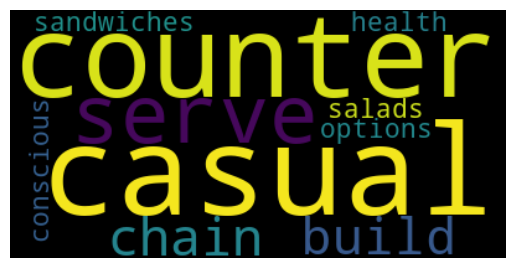

In [28]:
plt.imshow(wordcloud, interpolation="bilInear")
plt.axis("off")
plt.show()

In [ ]:
#df_maps_restaurantes.query(['latitude'].hist()
# What is this?